In [ ]:
'''
# Bu proje sadece Colabda yapilabilir. Cunku veri dosyasi cok buyuk. 
Hem internetinizi hem bilgisayarinizi zorlar.

The data contains the customer reviews for all listed *Electronics* 
products spanning from May 1996 up to July 2014. There are a total of
1,689,188 reviews by a total of 192,403 customers on 63,001 unique products.
Please download this Jupyter notebook file and redo everything by yourself 
and explain what is going on with your own words.

Bu jupyter notebook dosyasını indirip Amazon.com satılan elektronik ürünleri 
için yazılan 1 milyon 689 bin 188 yorum hakkında öğrendiğimiz 

- bütün NLP  metodları uygulayıp
- küçük harfe çevirip, noktalama işaretlerini ve HTML
taglerini kaldırıp, 
-'stopwords'leri kaldırıp
-iyi ve kötü yorumlar hakkında
- wordcloud (Kelime bulutu) oluşturup, 
- Overall Sütunundaki rating'e göre classification algoritmalarını çalıştırarak, yeni gelecek yorumların 
rating'ini tahmin eden bir model geliştirip, 
- NER(Named Entity Recognition)
gibi konuları araştırarak, her bölümden ne anladığınızı kendi yorumlarınızla 
yazıp, aynı kodları daha kısa yazarak geriye yükleyiniz.


Milyonlarca satır veri oldugu için df=df.sample(400000) ile sadece 400  
bin satır veri ile çalışacaksınız.
'''

In [1]:
import pandas as pd
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [2]:
df = pd.read_csv('amazon.csv', encoding='latin1')

In [3]:
df=df.sample(80000)

In [4]:
df.shape

(80000, 10)

## DATA MANIPULATION


In [5]:
df = df[['overall', 'reviewText', 'summary']]

In [6]:
# kucuk harfe donustur
df["reviewText"]=df["reviewText"].str.lower()
# noktalama isaretlerini kaldirma
df["reviewText"]=df["reviewText"].str.replace("[^\w\s]","") 
# rakamlari kaldir
df["reviewText"]=df["reviewText"].str.replace("\d+","") 
# \newline ve enter\r kaldir
df["reviewText"]=df["reviewText"].str.replace("\n"," ").replace("\r","") 
df["reviewText"]=df["reviewText"].str.replace("  "," ")

C:\Users\haluk\AppData\Local\Temp\ipykernel_15480\28496426.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["reviewText"]=df["reviewText"].str.replace("[^\w\s]","")
C:\Users\haluk\AppData\Local\Temp\ipykernel_15480\28496426.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df["reviewText"]=df["reviewText"].str.replace("\d+","")


In [7]:
#df['reviewText'].iloc[100]

In [8]:
# strip out html tags
import html
def del_html(text):
   return html.unescape(text)

# Apply to multiple columns
df[['reviewText','summary']] = df[['reviewText','summary']].apply(del_html)


In [9]:
# Remove STOP words
# Taken from Amazon 
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\haluk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haluk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\haluk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\haluk\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


In [10]:


from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]


In [11]:
#df.dropna(how= "all", inplace= True)
#df['reviewText'] = df['reviewText'].astype(str)
df['reviewText'].info()

<class 'pandas.core.series.Series'>
Int64Index: 80000 entries, 459565 to 622716
Series name: reviewText
Non-Null Count  Dtype 
--------------  ----- 
79943 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [12]:
#remove stop words, remove null/empty comment sections

import six
import time

i = 0;
nan_index = []
text_wo_sw = []
for text in df.reviewText:
    
    ret_str ="";
    if isinstance(text, six.string_types):
    
        splitted_text = text.split(" ");
        for word in splitted_text:
            #print(word)

            if len(word)>0 and isinstance(word, six.string_types):
                if word not in stop_words:
                    ret_str = ret_str +" "+word
                        
            #else :
                #print(word)
                #print('not string')
    else :
        #print(i) 
        #print(text)
        nan_index.append(i)
        #print('not a string unfortunately')
    
    text_wo_sw.append(ret_str)
    i=i+1;    
df['reviewText'] =  text_wo_sw 
df.drop(df.index[nan_index], inplace=True)

## WORD CLOUD

In [13]:
df.loc[df['overall'] == 3,"sentiment"]= 0
df.loc[df['overall'] < 3,"sentiment"]= -1
df.loc[df['overall'] > 3,"sentiment"]= 1

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def wc(data,bgcolor):
    from PIL import Image
    #plt.figure(figsize(10,10))
    plt.figure()
    mask = np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask = mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [15]:
neutral =  df[ df ['sentiment']==0 ]['reviewText']
positive = df[ df ['sentiment']==1 ]['reviewText']
negative = df[ df ['sentiment']==-1 ]['reviewText']

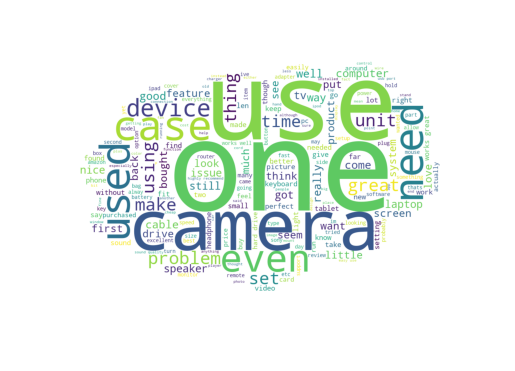

In [16]:
wc( positive, 'white')

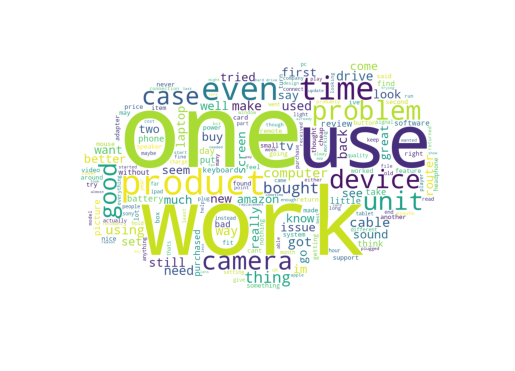

In [17]:
wc( negative, 'white')

## SENTIMENT ANALYSIS

In [18]:
from textblob import TextBlob
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity


In [19]:
df['sentiment'] = df['reviewText'].apply(detect_sentiment)

In [20]:
df.sentiment.value_counts()

0.000000    2496
0.500000    1171
0.400000     763
0.800000     748
0.250000     719
            ... 
0.184216       1
0.094545       1
0.013991       1
0.074963       1
0.099167       1
Name: sentiment, Length: 32062, dtype: int64

In [21]:
import seaborn as sns

In [22]:
#from matplotlib import pyplot as plt
#plt.figure(figsize=(12,8));
#sns.countplot(x = df['sentiment']);
#plt.xticks(rotation=90);

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
vect = CountVectorizer

In [25]:
# 0 notr , 1: positiv, 2, negativ
def sntmnt(score):
    try :
        if score > 0.2: 
            return 1
        elif score <-0.2:
            return 2
        else :
            return 0
    except:
        return 


In [26]:
df['class'] = df['sentiment'].apply(sntmnt)

In [27]:
df['class']

459565     0
1056939    1
538435     1
1355712    0
1397294    1
          ..
14313      0
1450883    0
1474796    0
1049339    0
622716     0
Name: class, Length: 79943, dtype: int64

<Axes: xlabel='class', ylabel='count'>

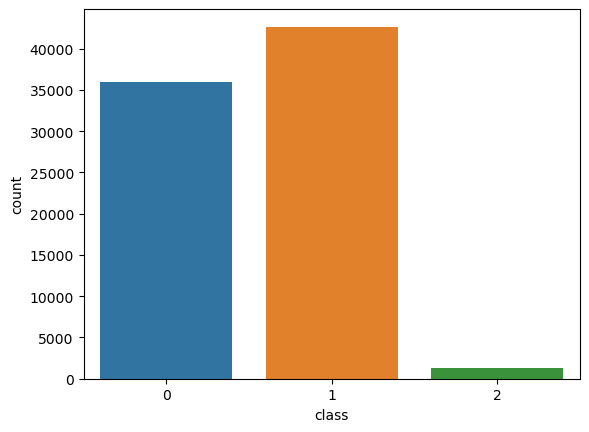

In [28]:
sns.countplot(x=df['class'])

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
d=DecisionTreeClassifier()

In [31]:
x = df['reviewText']
y = df['class']

In [32]:
x = df['reviewText'].values.tolist()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x =vectorizer.fit_transform(x)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)


In [35]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
b=BernoulliNB()
d=DecisionTreeClassifier()

In [36]:
model = b.fit(x_train,y_train)
model2 = d.fit(x_train,y_train)

In [37]:
tahmin=model.predict(x_test)
tahmin2=model2.predict(x_test)

In [38]:
accuracy_score(tahmin,y_test)

0.6288698480205142

In [39]:
accuracy_score(tahmin2,y_test)

0.7353805741447245

In [40]:

def algo_test(x,y):
    
    import numpy as np

    from scipy import stats
    import matplotlib.pyplot as plt
    %matplotlib inline 
    import seaborn as sns


    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
    from sklearn.tree import ExtraTreeClassifier
    from sklearn.ensemble import GradientBoostingRegressor
    from xgboost import XGBRegressor 

    from sklearn.model_selection import train_test_split

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC

    import warnings
    warnings.filterwarnings('ignore')
    #plt.style.use('')

    
    
    G = GaussianNB()
    B = BernoulliNB()
    K = KNeighborsClassifier()
    L = LogisticRegression()
    D = DecisionTreeClassifier()
    S = SVC()
    
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 13)
    
    #algos = [G,B,K,L,D,S]
    algos = [G,B,K,L,D]
    
    #algo_names = [ "Gaussian", "Bernoulli", "K-Neighbors", "Logistic Regression", "Decision Tree","SVC" ]
    algo_names = [ "Gaussian", "Bernoulli", "K-Neighbors", "Logistic Regression", "Decision Tree" ]
    
    ASC = [];
    
    result =  result = pd.DataFrame(columns =['Accuracy_Score'], index = algo_names)
    
    i = 0;
    for algo in algos :
        
        algo.fit(x_train,y_train)
        print (accuracy_score(  y_test, algo.predict(x_test) ))
        ASC.append(  accuracy_score(  y_test, algo.predict(x_test) ) )
        
        print( "Confusion matrix: ",format(algo_names[i]) )
        i = i+1;
        print ( confusion_matrix(algo.predict(x_test),y_test) )
        
        #algo.fit(x,y)
        #print (accuracy_score(  y, algo.predict(x) ))
        #ASC.append(  accuracy_score(  y, algo.predict(x) ) )
    
    
    result.Accuracy_Score = ASC;

    return result.sort_values('Accuracy_Score', ascending=False)
    

In [41]:
algo_test(x.toarray(),y)

0.5014697604603164
Confusion matrix:  Gaussian
[[2221 1621   32]
 [4370 5721  154]
 [ 646 1148   76]]
0.6248670961285884
Confusion matrix:  Bernoulli
[[2966 1465   27]
 [4270 7025  235]
 [   1    0    0]]
0.5812120833072737
Confusion matrix:  K-Neighbors
[[4579 3781  176]
 [2655 4709   81]
 [   3    0    5]]
0.9026205516292451
Confusion matrix:  Logistic Regression
[[6601  662  259]
 [ 634 7828    0]
 [   2    0    3]]
0.7333791981987616
Confusion matrix:  Decision Tree
[[5031 1874  163]
 [2066 6610   14]
 [ 140    6   85]]


,Accuracy_Score
Logistic Regression,0.902621
Decision Tree,0.733379
Bernoulli,0.624867
K-Neighbors,0.581212
Gaussian,0.501470
